In [25]:
import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from torch import nn # contains all the building blocks for neural networks

# Data Preperation


In [40]:
# create a linear regression like
weights = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weights * X + bias

# Data Split To Train And Test Set

In [41]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

 

# Data Visualisation

In [42]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
    plt.figure(figsize=(10,7))

    # plot train data in blue
    plt.scatter(train_data,train_labels, c = 'b', s = 4, label = 'Training Data')

    # plot test data in green
    plt.scatter(test_data,test_labels, c = 'g', s = 4, label = 'Test data')

    # are there predictions?
    if predictions != None:
        plt.scatter(test_data,predictions, c = 'r', s =4, label = 'predictions')

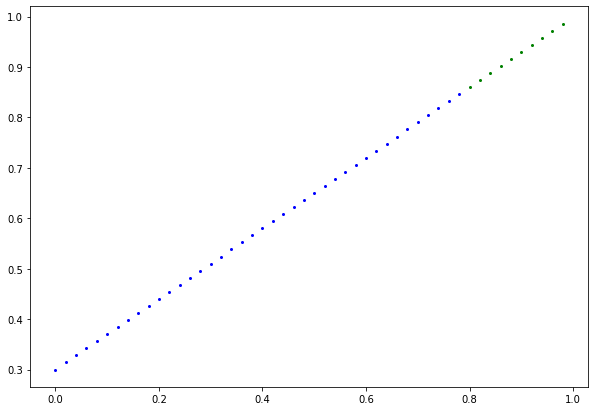

In [43]:
plot_predictions()

# Build Model

In [44]:
from torch import nn

# Creating a Linear Regression Class
class LinearRegressionClass(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    
    # to define the computation in the model
    def forward(self, x:torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias 



# Checking the contents of Pytorch model
use '.parameters' to check whats inside the model


In [45]:
# create a random seed to understand values
torch.manual_seed(42)

# create an object of Linear regression class
model_0 = LinearRegressionClass()

# check parameters
list(model_0.parameters())

# list of named parameters -> provides the dictionaries of the parameters of the mdodels
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [46]:
# premise of deep learning is to start with random values and get close to these actual values. 
weights, bias

(0.7, 0.3)

# Make predictions to check how bad the model is

In [52]:
# use torch.inference_mode()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

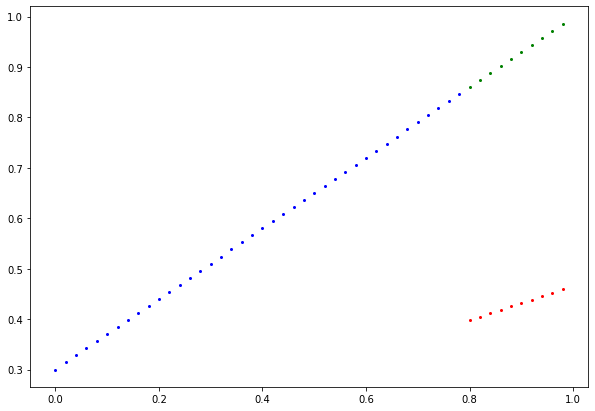

In [53]:
# we can obsere that with the random weights and bias the predictions are very bad. 
plot_predictions(predictions = y_preds)

# Training

The whole idea of training is for model to move from unknown parameters to good parameters. Move from bad representation of data to good representation of data.

Things we need to train:
* **Loss function**: A function to measure how wrong the models predictions are to the ideal outputs. Lower is better
* **optimizer**: Takes into account the loss of a model and adjust the parameters(weights and biases) to improve the loss the function.
    * inside the optimizer you have two set of parameters:
        * params - the model parameters that you would like to optimize
        * learning rate  - how big the each step needs to be while optimizing.

In Pytorch we need:
* Training loop
* Testing loop

Training loop: 
1. Loop through the data
2. set to training mode - this sets grad = true. It allows tracking of gradients.
3. Forward pass
4. Calculate the loss (compare the forward pass results with ground truth labels)
5. Optimize the zero grad
6. Loss backwards - move backwards through the network to calculate the gradients of each parameter with respect to the loss
7. optimizer step - use the optimizer to adjust the parameters and improve the loss (** Gradient Descent **)


In [57]:
# See the parameters
model_0.state_dict()

# set a loss function
loss_fn = torch.nn.L1Loss()

# create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.01) # learning rate

In [82]:
# Building a training loop
# epoch is one loop through the data
epochs = 100
for epoch in range(epochs):
    # set the model to training model. this sets grad = True
    model_0.train()

    # forward pass
    y_pred = model_0.forward(X_train)

    # calculate loss 
    loss = loss_fn(y_pred, y_train)

    # optimizer grad zero
    optimizer.zero_grad

    # perform back propogation on loss
    loss.backward()

    # step the optimizer (gradient descent)
    optimizer.step() # by default the optimizer changes will accumulate through the loop..so we need to zero them before the next iteration of the loop


loss:0.15922574698925018
loss:0.21295955777168274
loss:0.25517234206199646
loss:0.2858641445636749
loss:0.30503493547439575
loss:0.3126847743988037
loss:0.30881354212760925
loss:0.29342132806777954
loss:0.26650816202163696
loss:0.22807392477989197
loss:0.1781187355518341
loss:0.1166425347328186
loss:0.05414777994155884
loss:0.055157650262117386
loss:0.10798324644565582
loss:0.16991813480854034
loss:0.22033202648162842
loss:0.25922495126724243
loss:0.2865968346595764
loss:0.30244773626327515
loss:0.30677759647369385
loss:0.29958653450012207
loss:0.28087443113327026
loss:0.2506413161754608
loss:0.2088872194290161
loss:0.15561212599277496
loss:0.09351558983325958
loss:0.054467786103487015
loss:0.06683953106403351
loss:0.13000808656215668
loss:0.1882331669330597
loss:0.23493726551532745
loss:0.2701203525066376
loss:0.29378247261047363
loss:0.30592355132102966
loss:0.3065436780452728
loss:0.29564279317855835
loss:0.27322086691856384
loss:0.23927795886993408
loss:0.19381406903266907
loss:0.1

In [85]:
with torch.inference_mode():
    new_pred2 = model_0(X_test)

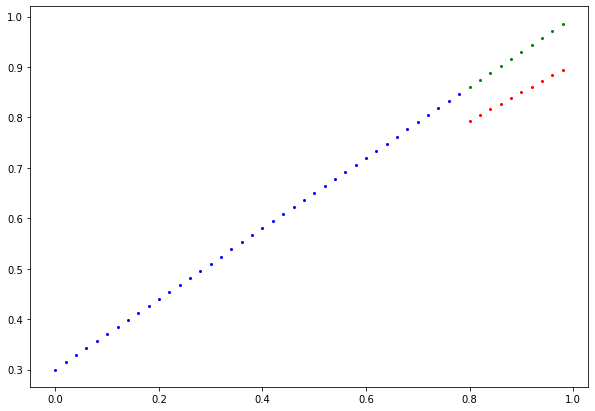

In [86]:
plot_predictions(predictions=new_pred2)